In [2]:
desired=['DIVISION',
'REGION',
'YBL',
'MV',
'HINCP',
'NP',
'BDSP',
'RMSP',
'FS',
'ACCESS',
'MODEM',
'SATELLITE',
'DIALUP',
'RAC1P_HH']

In [2]:
desired = ['DIVISION',
'ST',
'ELEP',
'GASP',
'FULP',
'YBL',
'MV',
'HINCP',
'TEN',
'NP',
'CONP',
'BLD',
'BDSP',
'RMSP',
'FS',
'ACCESS',
'MODEM',
'SATELLITE',
'DIALUP',
'DSL',
'FIBEROP',
'HFL',
'LAPTOP',
'REFR',
'STOV',
'FES',
'HISP',
'RAC1P',
'AGEP',
'SCHL',
'INTP',
'WAGP',
'RETP',
'SSIP',
'POVPIP']

In [3]:
import os
import pandas as pd
import numpy as np
import json
import random
data_dir = 'data/csv'

In [4]:
def load_state(h_fn, p_fn):
    with open(p_fn) as f:
        person_data = pd.read_csv(f, na_values=['','.',' '])
        person_data = person_data[person_data.columns[:129]]
        person_data.drop('SOCP', 1, inplace=True)
        person_data.drop('NAICSP', 1, inplace=True)
        person_data.SPORDER.fillna(1, inplace=True)
    householder_data = person_data[person_data.SPORDER == 1]
    
    with open(h_fn) as f:
        housing_data = pd.read_csv(f, na_values=['','.',' '])
        housing_data = housing_data[housing_data.columns[:102]]
        
    merged_data = pd.merge(
        housing_data, person_data, how='inner', on=['SERIALNO', 'PUMA', 'ST', 'ADJINC'], suffixes=['_H', '_P'])
    merged_data = pd.merge(
        merged_data, householder_data,
        how='outer', on=['SERIALNO', 'PUMA', 'ST', 'ADJINC'],
        suffixes=['','_HH']
    )
    merged_data.PUMA = merged_data.ST * 100000 + merged_data.PUMA
    merged_data.WGTP = merged_data.WGTP / ((merged_data.NP == 0) + merged_data.NP)
    return merged_data

In [5]:
housing_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if (f.endswith('.csv') and 'ss14h' in f)]
person_files = [f.replace('ss14h', 'ss14p') for f in housing_files]

sample = None
data = None

for h_fn, p_fn in zip(housing_files, person_files):
    print('\r' + p_fn, end='')
    state_data = load_state(h_fn, p_fn)
    state_data = state_data[['PUMA', 'WGTP', 'SERIALNO'] + desired]
    data = pd.concat([
        data,
        state_data
    ])

data/csv/ss14ptn.csv

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (95,126) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


data/csv/ss14ppr.csv

In [7]:
import json
with open('normalized_variables.json') as f:
    variables = json.load(f)

In [8]:
variable_schemas = [v for v in variables if v['field'] in desired]

for v in variable_schemas:
    key = v['field']
    for na in v['na_values']:
        print('Replacing %s in %s' % (na, key))
        data[key].replace(na, None, inplace=True)

Replacing   in ACCESS
Replacing    in BDSP
Replacing   in DIALUP
Replacing   in FS
Replacing   in MODEM
Replacing    in RMSP
Replacing   in SATELLITE
Replacing bb in YBL
Replacing           in HINCP
Replacing 0 in HINCP
Replacing b in MV


<IPython.core.display.Javascript object>


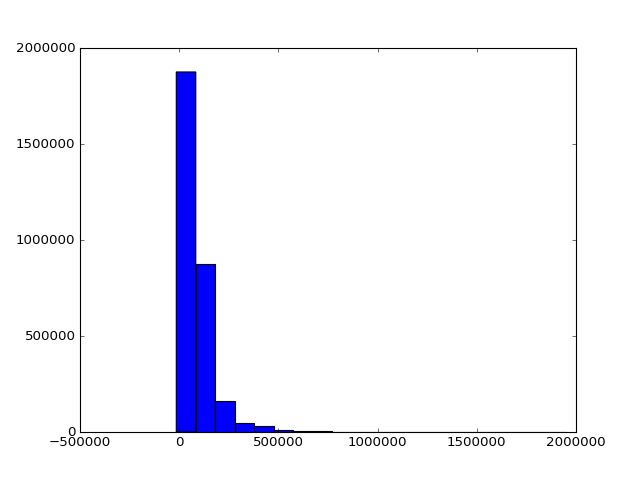

In [11]:
%matplotlib nbagg
import matplotlib.pyplot as plt
plt.figure()
plt.hist(data.HINCP[data.HINCP.notnull()], 20)
plt.show()

<IPython.core.display.Javascript object>


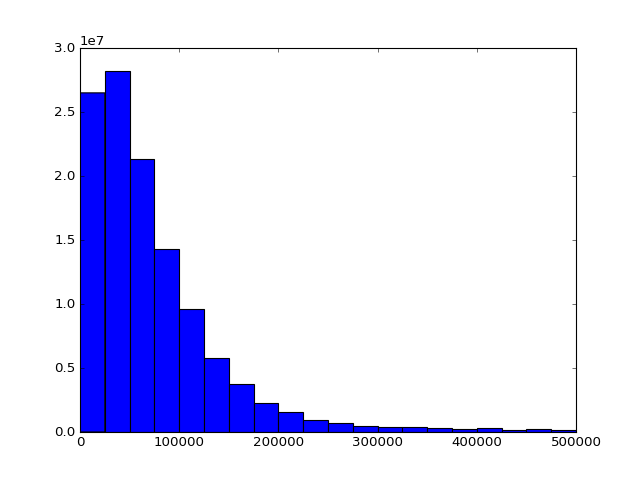

In [16]:
plt.figure()
plt.hist(data.HINCP[data.HINCP.notnull()], weights=data.WGTP[data.HINCP.notnull()], bins=20, range=(0, 500000))
plt.show()

In [17]:
len(data)

3164116

In [6]:
data.to_csv('data/join_features.csv')